<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_516~528%2C_544~561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

### 문서 군집화 개념
* 문서 군집화: 비슷한 텍스트 구성의 문서를 군집화하는 것
* 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 텍스트 분류 기반의 문서 분류와 유사함
* 하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 데 반해, 문서 군집화는 데이터 세트가 필요없는 비지도학습 기반으로 동작

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
* 문서 군집화를 수행할 데이터 세트는 UCI 머신러닝 리포지토리에 있는 Opinion Review 데이터 세트
* 51개의 텍스트 파일로 구성돼 있으며, 각 파일은 Tripadvior, Edmunds.com, Amazon.com 사이트에서 가져온 리뷰 문서
* 각 문서는 약 100개 정도의 문장을 가지고 있음.

* 여러 개의 파일을 DataFrame으로 로딩하는 로직은 먼저 해당 디렉터리 내의 모든 파일에 대해 각각 for 반복문으로 반복하면서 개별 파일명을 파일명 리스트에 추가하고 개별 파일은 DataFrame으로 읽은 후 다시 문자열로 반환한 뒤 파일 내용 리스트에 추가.
* 이렇게 만들어진 파일명 리스트와 파일 내용 리스트를 이용해 새롭게 파일명과 파일 내용을 칼럼으로 가지는 DataFrame을 생성.


In [1]:
from google.colab import drive
drive.mount("/content/drive")

# 경로 이동
%cd /content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics

Mounted at /content/drive
/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics


In [2]:
import pandas as pd
import glob, os

all_files = glob.glob('*.data')
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_netbook_1005ha,...
1,bathroom_bestwestern_hotel_sfo,...
2,comfort_toyota_camry_2007,...
3,accuracy_garmin_nuvi_255W_gps,...
4,comfort_honda_accord_2008,...


* 각 파일 이름 자체만으로 의견의 텍스트가 어떠한 제품/서비스에 대한 리뷰인지 잘 알 수 있음.
* 문서를 TF-IDF 형태로 피처 벡터화.
* tokenizer은 Lemmatization을 구현한 LemNormalize() 함수를 이용할 것이며 ngram은 (1, 2)로 하고, min_df와 max_df 범위를 설정해 피처의 개수를 제한.
* TfidfVectorizer의 fit_transform()의 인자로 document_df DataFrame의 opinion_text 칼럼을 입력하면 개별 문서 텍스트에 대해 TF-IDF 변환된 피처 벡터화된 행렬을 구할 수 있음.

In [3]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = "english",
                             ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df["opinion_text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


* 문서별 텍스트가 TF-IDF 변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행해 어떤 문서끼리 군집화되는지 확인
* 군집화 기법은 K-평균을 적용
* 문서의 유형은 크게 보자면 전자제품, 자동차, 호텔로 되어있음.
* 먼저 5개의 중심 기반으로 어떻게 군집화되는지 확인

In [5]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* 각 데이터별로 할당된 군집의 레이블을 파일명과 파일 내용을 가지고 있는 document_df DataFrame에 "cluster_label" 칼럼을 추가해 저장
* 각 파일명은 의견 리뷰에 대한 주제를 나타냄

In [6]:
document_df["cluster_label"] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_netbook_1005ha,...,3
1,bathroom_bestwestern_hotel_sfo,...,0
2,comfort_toyota_camry_2007,...,2
3,accuracy_garmin_nuvi_255W_gps,...,4
4,comfort_honda_accord_2008,...,2


* 판다스 DataFrame의 sort_values(by = 정렬칼럼명)를 수행하면 인자로 입력된 "정렬칼럼명"으로 데이터를 정렬할 수 있음.

In [7]:
# cluster_label = 0인 데이터 세트
document_df[document_df["cluster_label"] == 0].sort_values(by = "filename")

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,0
14,food_holiday_inn_london,...,0
16,food_swissotel_chicago,...,0
10,free_bestwestern_hotel_sfo,...,0
17,location_bestwestern_hotel_sfo,...,0
25,location_holiday_inn_london,...,0
22,parking_bestwestern_hotel_sfo,...,0
32,price_holiday_inn_london,...,0
35,room_holiday_inn_london,...,0
30,rooms_bestwestern_hotel_sfo,...,0


In [8]:
# cluster_label = 1인 데이터 세트
document_df[document_df["cluster_label"] == 1].sort_values(by = "filename")

,filename,opinion_text,cluster_label
7,buttons_amazon_kindle,...,1
9,eyesight-issues_amazon_kindle,...,1
12,fonts_amazon_kindle,...,1
18,navigation_amazon_kindle,...,1
34,price_amazon_kindle,...,1
45,speed_windows7,...,1


* 킨들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화돼 있음.

In [9]:
# cluster_label = 2인 데이터 세트
document_df[document_df["cluster_label"] == 2].sort_values(by = "filename")

,filename,opinion_text,cluster_label
4,comfort_honda_accord_2008,...,2
2,comfort_toyota_camry_2007,...,2
13,gas_mileage_toyota_camry_2007,...,2
19,interior_honda_accord_2008,...,2
24,interior_toyota_camry_2007,...,2
21,mileage_honda_accord_2008,...,2
23,performance_honda_accord_2008,...,2
33,quality_toyota_camry_2007,...,2
29,seats_honda_accord_2008,...,2
39,transmission_toyota_camry_2007,...,2


* Cluster #1과 비슷하게 킨들, 아이팟, 넷북이 군집에 포함돼 있지만, 주로 차량용 네비게이션으로 군집이 구성돼 있음.

In [10]:
# cluster_label = 3인 데이터 세트
document_df[document_df["cluster_label"] == 3].sort_values(by = "filename")

,filename,opinion_text,cluster_label
5,battery-life_amazon_kindle,...,3
8,battery-life_ipod_nano_8gb,...,3
0,battery-life_netbook_1005ha,...,3
11,features_windows7,...,3
20,keyboard_netbook_1005ha,...,3
37,performance_netbook_1005ha,...,3
27,screen_garmin_nuvi_255W_gps,...,3
36,screen_ipod_nano_8gb,...,3
31,screen_netbook_1005ha,...,3
38,size_asus_netbook_1005ha,...,3


* 킨들 리뷰가 한 개 섞여 있는 것이 살짝 아쉽지만, Cluster #0과 같이 대부분 호텔에 대한 리뷰로 군집화돼 있음.

In [11]:
# cluster_label = 4인 데이터 세트
document_df[document_df["cluster_label"] == 4].sort_values(by = "filename")

,filename,opinion_text,cluster_label
3,accuracy_garmin_nuvi_255W_gps,...,4
6,directions_garmin_nuvi_255W_gps,...,4
15,display_garmin_nuvi_255W_gps,...,4
28,satellite_garmin_nuvi_255W_gps,...,4
41,speed_garmin_nuvi_255W_gps,...,4
40,updates_garmin_nuvi_255W_gps,...,4


* 전반적으로 군집화된 결과를 살펴보면 군집 개수가 약간 많게 설정돼 있어서 세분화되어 군집화된 경향이 있음.
* 중심 개수를 5개에서 3개로 낮춰서 3개 그룹으로 군집화된 뒤 결과 확인.

In [12]:
from sklearn.cluster import KMeans

# 3개 집합으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df["cluster_label"] = cluster_label
document_df.sort_values(by = "cluster_label")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
0,battery-life_netbook_1005ha,...,0
45,speed_windows7,...,0
43,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
41,speed_garmin_nuvi_255W_gps,...,0
40,updates_garmin_nuvi_255W_gps,...,0
38,size_asus_netbook_1005ha,...,0
37,performance_netbook_1005ha,...,0
36,screen_ipod_nano_8gb,...,0
34,price_amazon_kindle,...,0
31,screen_netbook_1005ha,...,0


* Cluster #0은 포터블 전자기기 리뷰로만 군집화가 잘 됨.
* Cluster #1도 호텔 리뷰로만 군집이 잘 구성됨.
* Cluster #2 역시 자동차 리뷰로만 군집이 잘 구성됨.

### 군집별 핵심 단어 추출하기
* 각 군집에 속한 문서는 핵심 단어를 주축으로 군집화돼 있을 것.
* KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 clusters_centers_라는 속성으로 제공.
* clusters_centers_는 배열 값으로 제공되며, 행은 개별 군집을, 열은 개별 피처를 의미함.
* 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값.

In [13]:
cluster_centers = km_cluster.cluster_centers_
print("cluster_centers shape: ", cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


* cluster_centers_는 (3, 2409) 배열
* 이는 군집이 3개, word 피처가 2409개로 구성되었음을 의미함
* 각 행의 배열 값은 각 군집 내의 2409개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 것
* 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미함
>
* cluster_centers 속성을 사용하여 각 군집별 핵심 단어를 찾음.
* cluster_centers_는 파이썬의 ndarray이며, ndarray의 argsort() 메소드를 사용하여 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환함.
* 이 위치 인덱스 값이 필요한 이유는 핵심 단어 피처의 이름을 출력하기 위함임.
* 위의 처리를 하기 위해 get_cluster_details() 함수를 사용
* get_cluster_details() 함수는 cluster_centers_ 배열 내에서 가장 값이 큰 데이터의 위치 인덱스를 추출한 뒤, 해당 인덱스를 이용해 핵심 단어 이름과 그때의 상대 위치 값을 추출해 cluster_details라는 Dict 객체 변수에 기록하고 반환함.

In [14]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features = 10):
  cluster_details = {}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

  # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화.
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]["cluster"] = cluster_num

    # cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함.
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]["top_features"] = top_features
    cluster_details[cluster_num]["top_features_value"] = top_feature_values
    filenames = cluster_data[cluster_data["cluster_label"] == cluster_num]["filename"]
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]["filenames"] = filenames

  return cluster_details

* get_cluster_details()를 호출하면 dictionary를 원소를 가지는 리스트인 cluster_details를 바노한
* cluster_details에는 개별 군집번호, 핵심 단어, 핵심단어 중심 위치 상댓값, 파일명 속성 값 정보가 있는데, 이를 좀 더 보기 좋게 표현하기 위해서 별도의 print_cluster_details() 함수를 만듦.

In [15]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print("###### Cluster {0}".format(cluster_num))
    print("Top features: ", cluster_detail["top_features"])
    print("Revies 파일명: ", cluster_detail["filenames"][:7])
    print("================================================")

* get_cluster_detail() 호출 시 인자는 KMeans 군집화 객체, 파일명 추출을 위한 document_df DataFrame, 핵심 단어 추출을 위한 피처명 리스트, 전체 군집 개수, 그리고 핵심 단어 추출 개수.
* 피처명 리스트 앞에서 TF-IDF 변환된 tfidf_vect 객체에서 get_feature_names()로 추출

In [16]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                      feature_names = feature_names, clusters_num = 3, top_n_features = 10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features:  ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Revies 파일명:  ['battery-life_netbook_1005ha', 'accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'buttons_amazon_kindle', 'battery-life_ipod_nano_8gb', 'eyesight-issues_amazon_kindle']
###### Cluster 1
Top features:  ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Revies 파일명:  ['bathroom_bestwestern_hotel_sfo', 'free_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'location_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'location_holiday_inn_london']
###### Cluster 2
Top features:  ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Revies 파일명:  ['comfort_toyota_camry_2007', 'comfort_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'interior_honda

* 포터블 전자제품 리뷰 군집인 Cluster #0에서는 "screen", "battery", "life"등과 같은 화면과 배터리 수명 등이 핵심 단어로 군집화됨.
* 호텔 리뷰 군집인 Cluster #1에서는 "room", "hotel", "service", "location"등 같은 방과 서비스 등이 핵심 단어로 군집화됨.
* 자동차 리뷰 군집인 Cluster #2에서는 "interior", "seat", "mileage", "comfortable" 등과 같은 실내 인테리어, 좌석, 연료 효율 등이 핵심 단어로 군집화됨.

## 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge
* Mercari Price Suggestion Challenge는 캐글에서 진행된 Challenge로서, 일본의 대형 온라인 쇼핑몰인 Mercari사의 제품에 대해 가격을 예측하는 과제.
* 제공되는 데이터 세트는 제품에 대한 여러 속상 및 제품 설명 등의 텍스트 데이터로 구성됨.
* Mercari사는 이러한 데이터를 기반으로 제품 예상 가격을 판매자들에게 제공하고자 함.

* 제공되는 데이터 세트의 속성
 * train_id: 데이터 id
 * name: 제품명
 * item_condition_id: 판매자가 제공하는 제품 상태
 * brand_name: 브랜드 이름
 * price: 제품 가격 - 예측해야 할 타깃 값
 * shipping: 배송비 무료 여부
 * item_description: 제품에 대한 설명

* Mercari Price Suggestion이 기존 회귀 예제와 다른 점은 item_description과 같은 텍스트 형태의 비정형 데이터와 다른 정형 속성을 같이 적용해 회귀를 수행한다는 점

### 데이터 전처리

In [17]:
import os
os.chdir('/content')

In [19]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv("mercari_train.tsv", sep = "\t")
print(mercari_df.shape)
mercari_df.head(3)

(4658, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


* 1482535개의 레코드를 가지고 있는 데이터 세트

In [20]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           4658 non-null   int64  
 1   name               4658 non-null   object 
 2   item_condition_id  4658 non-null   int64  
 3   category_name      4636 non-null   object 
 4   brand_name         2650 non-null   object 
 5   price              4658 non-null   float64
 6   shipping           4658 non-null   int64  
 7   item_description   4658 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 291.2+ KB
None


* brand_name 칼럼의 경우 매우 많은 Null 값을 가지고 있음.
* brand_name은 가격에 영향을 미치는 중요 요인으로 판단되지만, 많은 데이터가 Null로 되어 있음.
* category_name은 약 6300건의 null 데이터를 가지고 있음.
* item_description의 null값은 4건으로 미미함.


<ipython-input-21-b3381b36de18>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde = False)


<Axes: xlabel='price'>

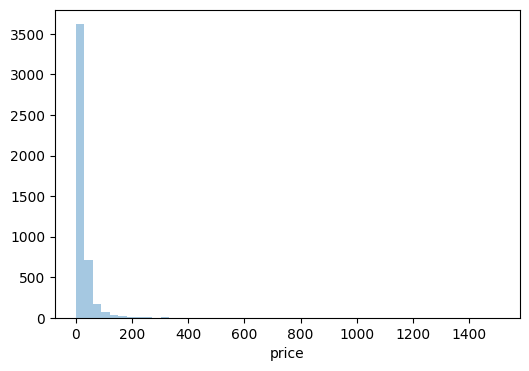

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df["price"]
plt.figure(figsize = (6, 4))
sns.distplot(y_train_df, kde = False)

* prcie 값이 비교적 적은 가격을 가진 데이터 값게 왜곡돼 분포돼 있음.

<ipython-input-22-dcfaed50b9ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde = False)


<Axes: xlabel='price'>

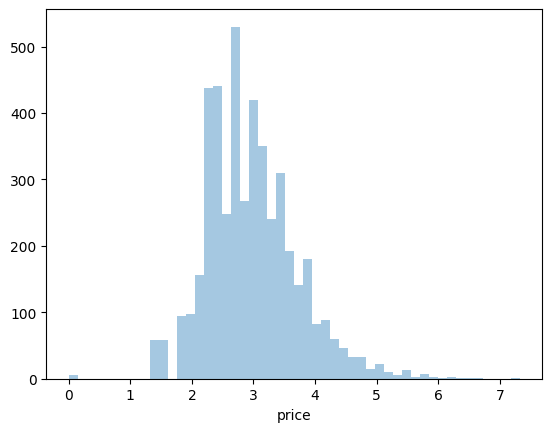

In [22]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde = False)

* 로그 값으로 변환하면 price 값이 비교적 정규 분포에 가까운 데이터를 이루게 됨.

In [23]:
mercari_df["price"] = np.log1p(mercari_df["price"])
mercari_df["price"].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [24]:
print("Shopping 값 유형:\n", mercari_df["shipping"].value_counts())
print("item_condition_id 값 유형:\n", mercari_df["item_condition_id"].value_counts())

Shopping 값 유형:
 0    2539
1    2119
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    2064
3    1338
2    1138
4     111
5       7
Name: item_condition_id, dtype: int64


* Shipping 칼럼은 배송비 유무이며, 값이 비교적 균일함.
* Item_condition_id는 판매자가 제공하는 제품 상태로서 각 값이 의미하는 바는 캐글에 기재돼 있지 않아서 알 수 없지만 1, 2, 3 값이 주를 이루고 있음.
* item_description 칼럼은 Null 값은 별로 없지만, description에 대한 별도 설명이 없는 경우 "No description yet"값으로 되돼 있음.

In [25]:
boolean_cond = mercari_df["item_description"] == "No description yet"
mercari_df[boolean_cond]["item_description"].count()

282

* "No description yet"의 경우도 Null과 마찬가지로 의미 있는 속성값으로는 사용될 수 없으므로 적절한 값으로 변경해야 함.
* category_name은 "/"로 분리된 카테고리를 하나의 문자열로 나타내고 있음.
* category_name은 텍스트이므로 피처 추출 시 tokenizer를 "/"로 하여 단어를 분리해 벡터화할 수도 있지만, 여기서는  category_name의 "/"를 기준으로 단어를 토큰화해 각각 별도의 피처로 저장하고 이를 이용해 알고리즘을 학습.


In [26]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
  try:
    return category_name.split("/")
  except:
    return ["Other_Null", "Other_Null", "Other_Null"]

# 위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성.
mercari_df["cat_dae"], mercari_df["cat_jung"], mercari_df["cat_so"] = \
zip(*mercari_df["category_name"].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print("대분류 유형: \n", mercari_df["cat_dae"].value_counts())
print("중분류 개수:", mercari_df["cat_jung"].nunique())
print("소분류 개수:", mercari_df["cat_so"].nunique())

대분류 유형: 
 Women                     2009
Beauty                     704
Kids                       546
Electronics                382
Men                        306
Home                       221
Other                      167
Vintage & Collectibles     145
Sports & Outdoors           78
Handmade                    78
Other_Null                  22
Name: cat_dae, dtype: int64
중분류 개수: 98
소분류 개수: 388


* 대분류의 경우 Women, Beauty, Kids 등의 분류가 매우 많음
* 중분류 유형은 114개, 소분류는 817개로 구성
>
* brand_name, category_name, item_description 칼럼의 Null 값은 일괄적으로 "Other Null"로 동일하게 변경

In [30]:
mercari_df["brand_name"] = mercari_df["brand_name"].fillna(value = "Other Null")
mercari_df["category_name"] = mercari_df["category_name"].fillna(value = "Other Null")
mercari_df["item_description"] = mercari_df["item_description"].fillna(value = "Other Null")

# 각 칼럼별로 Null 값 건수 확인. 모두 0이 나와야 합니다.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화
* Mercari Price Suggestion에 이용되는 데이터 세트는 문자열 칼럼이 많음.
* 이 문자열 칼럼 중 레이블 또는 원-핫 인코딩을 수행하거나 피처 벡터화로 변환할 칼럼을 선별.
* 예측 모델은 price 값, 즉 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 함.
* 선형 회귀 모델과 회귀 트리 모델을 모두 적용할 예정이며, 특히 선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호되므로 인코딩할 피처는 모두 원-핫 인코딩을 적용.
* 피처 벡터화의 경우는 비교적 짧은 텍스트의 경우는 Count 기반의 벡터화를, 긴 텍스트는 TF-IDF 기반의 벡터화를 적용

In [31]:
print("brand name의 유형 건수: ", mercari_df["brand_name"].nunique())
print("brand name sample 5건: \n", mercari_df["brand_name"].value_counts()[:5])

brand name의 유형 건수:  502
brand name sample 5건: 
 Other Null           2008
Nike                  156
Victoria's Secret     152
PINK                  150
LuLaRoe                91
Name: brand_name, dtype: int64


* brand name의 경우 대부분 명료한 문자열로 돼 있음.
* 별도의 피처 벡터화 형태로 만들 필요 없이 인코딩 변환을 적용하면 됨.

In [32]:
print("name의 유형 건수: ", mercari_df["name"].nunique())
print("name sample 10건: \n", mercari_df["name"].value_counts()[:10])

name의 유형 건수:  4606
name sample 10건: 
 Bundle                 5
Dress                  4
Converse               4
Black booties          3
Boots                  3
Mk purse               3
Pandora bracelet       3
LuLaRoe OS Leggings    3
Nike shorts            3
Coach ring             2
Name: name, dtype: int64


* 상품명은 name 속성의 경우 종류가 매우 많음.
* Name 속성은 유형이 매우 많고, 적은 단어 위주의 텍스트 형태로 돼 있으므로 Count 기반으로 피처 벡터화 변환을 적용.
* category_name 칼럼은 이전에 전처리를 통해서 해당 칼럼은 대, 중, 소 분류 세 개의 칼럼으로 분리. 원-핫 인코딩을 적용.
* shipping 칼럼은 배송비 무료 여부로서 0과 1, 두 가지 유형의 값을 가지고 있으며 item_condition_id는 상품 상태로서 1, 2, 3, 4, 5의 다섯 가지 유형의 값을 가지고 있음. 모두 원-핫 인코딩 적용.
* item_description은 상품에 대한 간단 설명으로 데이터 세트에서 가장 긴 텍스트를 가지고 있음.

In [34]:
pd.set_option("max_colwidth", 200)

# item_description의 평균 문자열 크기
print("item_description 평균 문자열 크기: ", mercari_df["item_description"].str.len().mean())

mercari_df["item_description"][:2]

item_description 평균 문자열 크기:  145.52747960498067


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

* 평균 문자열이 145자로 비교적 크므로 해당 칼럼은 TF-IDF로 변환.
>
* 주요 칼럼을 인코딩 및 피처 벡터화 변환

In [35]:
# name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1, 3), stop_words = "english")
X_descp = tfidf_descp.fit_transform(mercari_df["item_description"])

print("name_vectorization shape: ", X_name.shape)
print("item_description vectorization shape: ", X_descp.shape)

name_vectorization shape:  (4658, 4922)
item_description vectorization shape:  (4658, 50000)


* CountVectorizer, TfdifVectorizer가 fit_transform()을 통해 반환하는 데이터는 희소 행렬 형태.
* 희소 행렬 객체 변수인 X_name과 X_descp를 새로 결합해 새로운 데이터 세트를 구성해야 하고, 앞으로 인코딩 될 cat_dae, cat_jung, cat_so, brand_name, shipping, item_condition_id도 모두 X_name, X_descp와 결합돼 ML 모델을 실행하는 기반 데이터 세트로 재구성돼야 함.
* 이를 위해서 이 인코딩 대상 칼럼도 밀집 행렬 형태가 아닌 희소 행렬로 인코딩을 적용한 뒤, 함께 결합.
* 사이킷런은 원-핫 인코딩을 위해 OneHotEncoder와 LabelBinarizer 클래스를 제공.
* LabelBinarizer 클래스는 희소 행렬 형태의 원-핫 인코딩 변환을 지원. 생성 시 sparse_out = True로 파라미터를 설정해주기만 하면 됨.

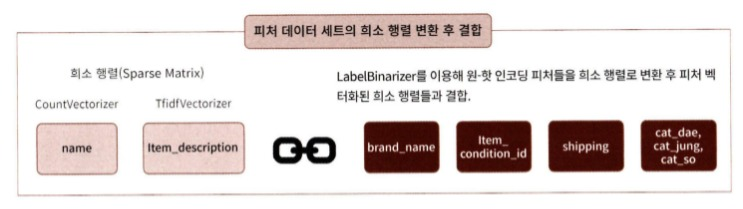

In [38]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들의 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output = True)
X_brand = lb_brand_name.fit_transform(mercari_df["brand_name"])
lb_item_cond_id = LabelBinarizer(sparse_output = True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df["item_condition_id"])
lb_shipping = LabelBinarizer(sparse_output = True)
X_shipping = lb_shipping.fit_transform(mercari_df["shipping"])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output = True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df["cat_dae"])
lb_cat_jung = LabelBinarizer(sparse_output = True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df["cat_jung"])
lb_cat_so = LabelBinarizer(sparse_output = True)
X_cat_so = lb_cat_so.fit_transform(mercari_df["cat_so"])

In [39]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print("X_brand_shape: {0}, X_item_cond shape: {1}".format(X_brand.shape, X_item_cond_id.shape))
print("X_shipping_shape: {0}, X_cat_dae shape: {1}".format(X_shipping.shape, X_cat_dae.shape))
print("X_cat_jung shape: {0}, X_cat_so shape: {1}".format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape: (4658, 502), X_item_cond shape: (4658, 5)
X_shipping_shape: (4658, 1), X_cat_dae shape: (4658, 11)
X_cat_jung shape: (4658, 98), X_cat_so shape: (4658, 388)


* 인코딩 변환된 데이터 세트가 CSR 형태로 변환된 csr_matrix 타입.
* 인코딩 칼럼이 매우 많이 생겼지만, 피처 벡터화로 텍스트 형태의 문자열이 가지는 벡터 형태의 매우 많은 칼럼과 함께 결합되므로 크게 문제 될 것은 없음.
>
* 앞에서 피처 벡터화 변환한 데이터 세트와 희소 인코딩 변환된 데이터 세트를 hstack()을 이용해 모두 결합.

In [40]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,\
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합.
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (4658, 55927)


364

* hstack()으로 결합한 데이터는 csr_matrix 타입

### 릿지 회귀 모델 구축 및 평가
* 적용할 평가 지표는 캐글에서 제시한 RMSLE 방식
* RMSLE는 RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식
* 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해서 이 방식을 도입

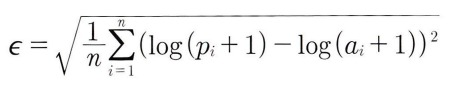

* 별도의 RMSLE를 구하는 함수를 rmsle(y, y_pred)로 생성.
* 원본 데이터의 price 칼럼의 값은 왜곡된 데이터 분포를 가지고 있기 때문에 이를 정규 분포 형태로 유도하기 위해 로그 값을 취해 변환함.
* 즉, 학습할 모델이 사용할 price 값은 로그 값으로 변환된 price 값이므로 예측도 당연히 로그로 변환된 데이터 값 수준의 price 값을 예측할 것.
* 따라서 학습 모델을 이용한 예측된 price 값은 다시 로그의 역변환인 지수변환을 수행해 원복해야 함

In [45]:
def rmsle(y, y_pred):
  # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
  # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요.
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  # rmsle로 RMSLE 값 추출
  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [46]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
  X = hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test = train_test_split(X, mercari_df["price"],
                                                      test_size = 0.2, random_state = 156)

  # 모델 학습 및 예측
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()

  return preds, y_test

* Ridge를 이용해 Mercari Price의 회귀 예측을 수행

In [48]:
linear_model = Ridge(solver = "lsqr", fit_intercept = False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print("Item Description을 제외했을 때 rmsle 값: ", evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, \
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print("Item Description을 포함한 rmsle 값: ", evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값:  0.6196711568942879
Item Description을 포함한 rmsle 값:  0.6024589272417659


* Item Description을 포함했을 때 rmsle 값이 감소함. Item description 영향이 중요.

### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가
* LightGBM으로 회귀 수행

In [49]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators = 200, learning_rate = 0.5, num_leaves = 125, random_state = 156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list = sparse_matrix_list)
print("LightGBM rmsle 값: ", evaluate_org_price(y_test ,lgbm_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12223
[LightGBM] [Info] Number of data points in the train set: 3726, number of used features: 792
[LightGBM] [Info] Start training from score 2.961855
LightGBM rmsle 값:  0.7224666446812005


* 앞 예제의 Ridge보다 예측 성능이 더 나아짐.
* 이렇게 구한 LightGBM의 예측 결괏값과 위에서 구한 Ridge의 예측 결괏값을 서로 앙상블해 최종 예측 결괏값을 도출.

In [50]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print("LightGBM과 Ridge를 ensemble한 최종 rmsle 값: ", evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값:  0.6087602962803933


## 11. 정리
* 텍스트 분석 기법을 상세히 배우고, 이를 이용한 분류, 감성 분석, 토픽 모델링, 군집화, 유사도 측정 등을 실습함.
* 텍스트 분석은 텍스트 정규화, 피처 벡터화(Count, TF-IDF), 그리고 머신러닝 모델 학습과 평가의 순서로 진행됨. 특히 TF-IDF는 문서의 길이가 긴 경우 더 좋은 결과를 도출하는 경향이 있음.
* 다양한 머신러닝 모델을 희소 행렬 기반의 데이터에 적용해보며, 한글 데이터에 대한 분석도 수행함.
* 또한, 정형 데이터와 비정형 데이터의 결합을 통해 회귀 예측 모델을 구현하는 실습도 포함됨.
* 텍스트 분석은 비정형 데이터에 새로운 가치를 부여하고, 결합 분석을 통해 기존의 데이터 분석으로는 발견할 수 없었던 인사이트를 제공함.